<h1>Consumo de energía</h1>

<h2>Notas</h2>

In [1]:
# Pais - Mexico
# Energy_type - Tipo de fuente de energía 
# Year - El año cuando registraron la data
# Energy_consumption - Cantidad de consumo para la fuente de energía específica, medida (quad Btu)
# Energy_production - Cantidad de producción para la fuente de energía específica, medida (quad Btu)
# GDP - PIB de los países en paridad de poder adquisitivo, medida (miles de millones de $ PPA de 2015)
# Population - población de pais, medida (Mperson)
# Energyintensityper_capita - La intensidad energética es una medida de la ineficiencia energética de una economía. Se calcula como unidades de energía por unidad de habitante (capita = persona individual), medida (MMBtu/persona)
# Energyintensityby_GDP- La intensidad energética es una medida de la ineficiencia energética de una economía. Se calcula como unidades de energía por unidad de PIB, medido (1000 Btu/2015$ PIB PPA)
# CO2_emission - La cantidad de C02 emitida, medida (MMtoneladas de CO2)

<h2>Artículos</h2>

In [2]:
#Artículos

#México apuesta su futuro energético al petróleo, no a las energías renovables
#https://www.nytimes.com/es/2022/08/17/espanol/mexico-petroleo-amlo-pemex.html#:~:text=the%20main%20story-,M%C3%A9xico%20apuesta%20su%20futuro%20energ%C3%A9tico%20al%20petr%C3%B3leo%2C%20no%20a%20las,los%20objetivos%20clim%C3%A1ticos%20de%20M%C3%A9xico.

<img src = 'https://static01.nyt.com/images/2022/08/15/world/17mexico-energy-esp-00/00mexico-energy-superJumbo.jpg?quality=75&auto=webp' width="400" height="500" alt = 'El presidente Andrés Manuel López Obrador el mes pasado en la refinería Olmeca Dos Bocas en Paraíso'></img>
<span><center>El presidente Andrés Manuel López Obrador el mes pasado en la refinería Olmeca Dos Bocas en Paraíso, Publicado 17 de agosto de 2022</center></span>

In [3]:
import warnings

def warn(*args, **kwargs):
    pass
warnings.warn = warn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px

In [4]:
from pandas.plotting import scatter_matrix, lag_plot
from sklearn.linear_model import LinearRegression
from scipy import stats
from scipy.stats import linregress
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from math import sqrt

In [5]:
def warn(*args, **kwargs):
    pass
warnings.warn = warn

In [6]:
pd.options.mode.chained_assignment = None
dataset = pd.read_csv('energy.csv')

In [7]:
mexico_df = dataset[dataset.Country == 'Mexico']
mexico_df['Energy_type'] = mexico_df['Energy_type'].replace(['all_energy_types','coal','natural_gas','petroleum_n_other_liquids','nuclear','renewables_n_other'],['todo_tipo_de_energía', 'carbón', 'gas_natural','petróleo_y_otros_líquidos','nuclear','renovables_n_otros'])

In [8]:
mexico_df.Energy_type.unique()

array(['todo_tipo_de_energía', 'carbón', 'gas_natural',
       'petróleo_y_otros_líquidos', 'nuclear', 'renovables_n_otros'],
      dtype=object)

In [9]:
corr_matrix = mexico_df.corr(numeric_only = True)

In [10]:
#Si observamos la matriz de correlación de Consumo_energético (Energy_consumption), 
#podemos ver que las emisiones_CO2(CO2_emission) son las que más afectan el consumo energético.

<h1>Matriz de correlación</h1>

In [11]:
corr_matrix['Energy_consumption'].sort_values(ascending = False)

Energy_consumption             1.000000
CO2_emission                   0.991656
Energy_production              0.938915
GDP                            0.152733
Year                           0.152501
Unnamed: 0                     0.152438
Population                     0.152073
Energy_intensity_per_capita    0.127606
Energy_intensity_by_GDP       -0.110423
Name: Energy_consumption, dtype: float64

<h2>Columnas de correlación</h2>

array([[<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_consumption'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_consumption'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='CO2_emission'>,
        <AxesSubplot:xlabel='Population', ylabel='CO2_emission'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='CO2_emission', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Energy_production', ylabel='Energy_production'>,
        <AxesSubplot:xlabel='Population', ylabel='Energy_production'>],
       [<AxesSubplot:xlabel='Energy_consumption', ylabel='Population'>,
        <AxesSubplot:xlabel='CO2_emiss

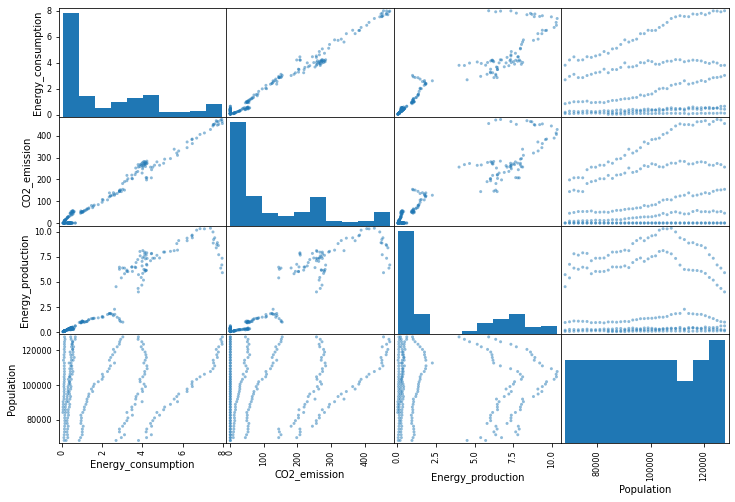

In [12]:
cols = ['Energy_consumption','CO2_emission', 'Energy_production', 'Population']
scatter_matrix(mexico_df[cols], figsize=(12, 8))

In [13]:
# Al crear un diagrama de dispersión para los tipos de energía, 
# muestra que el petróleo es el recurso no renovable número 1 que más se usa, 
# el gas natural es el segundo y parece que su consumo está aumentando

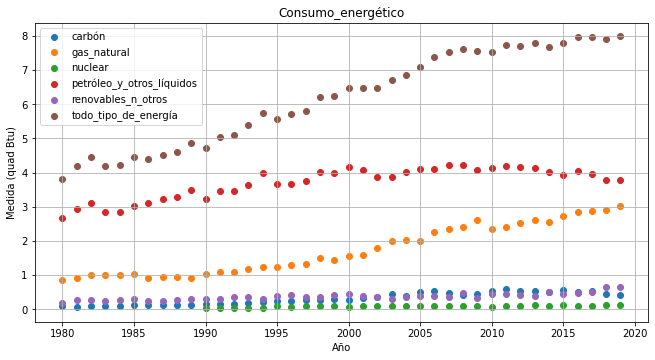

In [14]:
f, axes = plt.subplots(1,1, figsize = (11,5.5))

for a,(b,c) in enumerate(mexico_df.groupby('Energy_type')):
    axes.scatter(c.Year, c.Energy_consumption, label = b)
    
axes.legend()
axes.grid(True)
plt.title('Consumo_energético')
plt.xlabel('Año')
plt.ylabel('Medida (quad Btu)')
plt.show()

<h1>Gráficos circulares</h1>

<h2>Consumo_energético de 1980 - 2019 </h2>

In [15]:
total_energy_consumption = mexico_df.copy()
pie_chart_tec = total_energy_consumption.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()
pie_chart_tec.drop(pie_chart_tec[(pie_chart_tec['Energy_type'] == 'todo_tipo_de_energía')].index, inplace = True)

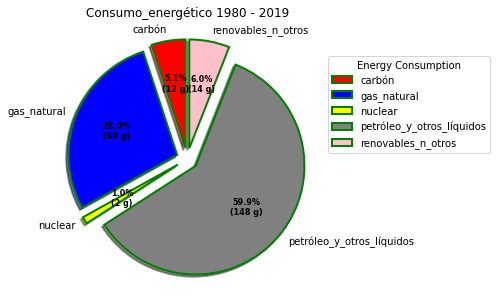

In [16]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(pie_chart_tec.Energy_consumption,
                                  autopct = lambda pct: func(pct, pie_chart_tec.Energy_consumption),
                                  labels = pie_chart_tec.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, pie_chart_tec.Energy_type,
          title ="Energy Consumption",
          loc ="center left",
          bbox_to_anchor =(1, .2, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Consumo_energético 1980 - 2019")
 
# show plot
plt.show()

<h2>Consumo_energético de 2015 - 2019</h2>

In [17]:
# Estaba mirando los últimos 5 años del conjunto de datos para ver cuál es su mayor consumo de energía. 
# Los últimos 5 años del conjunto de datos se utilizarán posteriormente para determinar si México ha tenido un 
# aumento o una disminución en su consumo de energía.

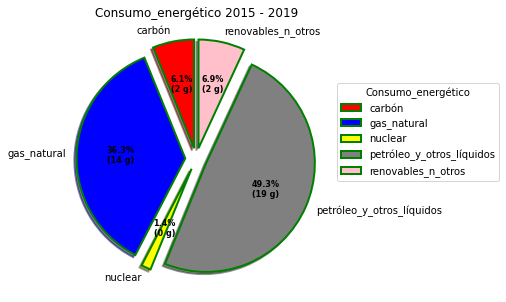

In [18]:
last5yrs = mexico_df.tail(30)

last5yrs= last5yrs.groupby('Energy_type').agg({'Energy_consumption': 'sum'}).reset_index()

last5yrs

last5yrs.drop(last5yrs[(last5yrs['Energy_type'] == 'todo_tipo_de_energía')].index, inplace = True)

def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)

wp = { 'linewidth' : 2, 'edgecolor' : "green" }

explode = (0.1, 0.1, 0.1, 0.1, 0.1)

colors = ( "red", "blue", "yellow",
          "grey", "pink", )

f, axes = plt.subplots(figsize = (11, 5))
wedges, texts, autotexts = axes.pie(last5yrs.Energy_consumption,
                                  autopct = lambda pct: func(pct, last5yrs.Energy_consumption),
                                  labels = last5yrs.Energy_type,
                                  explode = explode,
                                  colors = colors,
                                  shadow = True,
                                  startangle = 90,
                                  wedgeprops = wp,
                                  textprops = dict(color ="black"))

axes.legend(wedges, last5yrs.Energy_type,
          title ="Consumo_energético",
          loc ="center left",
          bbox_to_anchor =(1, 0.1, 0.5, 1))
 
plt.setp(autotexts, size = 8, weight ="bold")
axes.set_title("Consumo_energético 2015 - 2019")

# show plot
plt.show()

<h1>Todo tipo de energía</h1>

<h2>Emisiones de CO2</h2>

In [19]:
# all_energy_types en el conjunto de datos nos permite ver las emisiones totales de CO2 de todos los tipos 
# de energía (carbón, petróleo, gas natural, nuclear, renovables_n_otros), 
# así como los totales de todas las demás columnas para un año específico

# Usando todos los Tipos de Energía podemos ver que de 1980 a 2019 México sí tiene un incremento en 
# las emisiones de CO2 liberadas a la Atmósfera

# A continuación se muestra solo un ejemplo, si tuviera que sumar todos 
# los tipos de energía que equivaldría all_energy_types

In [20]:
mexico_df[mexico_df.Year == 2000][['Energy_type','Year','CO2_emission']]

#all_energy_types nos da la suma de todas las emisiones de carbono del Energy_type (Tipo de energía)

,Energy_type,Year,CO2_emission
28518,todo_tipo_de_energía,2000,364.302192
28519,carbón,2000,28.132987
28520,gas_natural,2000,77.054157
28521,petróleo_y_otros_líquidos,2000,259.115048
28522,nuclear,2000,0.000000
28523,renovables_n_otros,2000,0.000000


In [21]:
# Al crear funciones de densidad de probabilidad utilizando el Kernel Density Estimator, 
# podemos ver que el petróleo_n_otros_líquidos son los que producen la mayor cantidad de emisiones de CO2 
# en México.

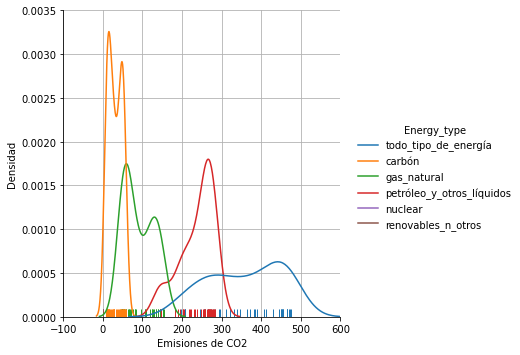

In [22]:
# Tenga en cuenta: si bien la estimación de la densidad del kernel produce una distribución de probabilidad, 
# la altura de la curva en cada punto da una densidad, no una probabilidad.

#Para Nuclear y renovables_n_other, están en la trama, sin embargo, no puedes verlos debido a que no liberan CO2.

sns.displot(data = mexico_df,
            x = "CO2_emission",
            hue = "Energy_type",
            kind = "kde",rug = True,
            legend = True
) 

plt.grid(True)
plt.xlabel('Emisiones de CO2')
plt.ylabel('Densidad')
plt.ylim(0, .0035)
plt.xlim(-100,600)

plt.show()

In [23]:
all_energy_df = mexico_df[mexico_df.Energy_type == 'todo_tipo_de_energía']
all_energy_df.fillna(0, axis = 0, inplace = True)

In [24]:
all_energy_df[ 'Change' ] = all_energy_df.Energy_consumption.rolling(2).mean()
all_energy_df['Change_CO2'] = all_energy_df.CO2_emission.rolling(2).mean()

In [25]:
x_all = np.array(all_energy_df.Population).reshape((-1,1))
y_all = np.array(all_energy_df.CO2_emission)

In [26]:
lr_model_all = LinearRegression().fit(x_all,y_all)

In [27]:
y_pred_all = lr_model_all.predict(x_all)

In [28]:
X2_all = sm.add_constant(x_all)
est_all = sm.OLS(y_all, X2_all)
est2_all = est_all.fit()
print(est2_all.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     319.5
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           4.31e-20
Time:                        22:15:51   Log-Likelihood:                -198.21
No. Observations:                  40   AIC:                             400.4
Df Residuals:                      38   BIC:                             403.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -206.5723     31.638     -6.529      0.0

In [29]:
r_squared_all = lr_model_all.score(x_all,y_all)
print(f'Coeficiente de Determinación (R-Cuadrado): {r_squared_all}',
      '\nIntersección Y:',lr_model_all.intercept_,
     '\nPendiente:',lr_model_all.coef_)

Coeficiente de Determinación (R-Cuadrado): 0.8937205177117008 
Intersección Y: -206.5723101561373 
Pendiente: [0.00566408]


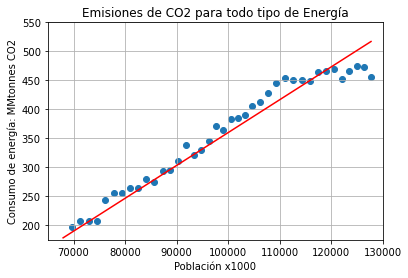

In [30]:
plt.scatter(all_energy_df.Population, all_energy_df.CO2_emission)
plt.grid(True)
plt.title('Emisiones de CO2 para todo tipo de Energía')
plt.xlabel('Población x1000')
plt.ylabel('Consumo de energía: MMtonnes CO2')
plt.xlim(65000, 130000)
plt.ylim(175, 550)

plt.plot(x_all, y_pred_all, color = 'red')

plt.show()

Cambio promedio móvil por año:  [0.0, 98.84, 134.95, 153.26, 164.06, 177.45, 188.71, 197.12, 204.68, 210.71, 217.04, 221.78, 227.24, 232.12, 237.34, 243.66, 248.2, 252.77, 257.65, 263.34, 268.15, 273.35, 278.21, 282.84, 287.77, 292.59, 297.64, 302.9, 308.12, 312.89, 317.36, 321.46, 325.78, 329.89, 333.87, 337.16, 340.62, 344.15, 347.44, 350.15]
Cambio promedio móvil: 254.58


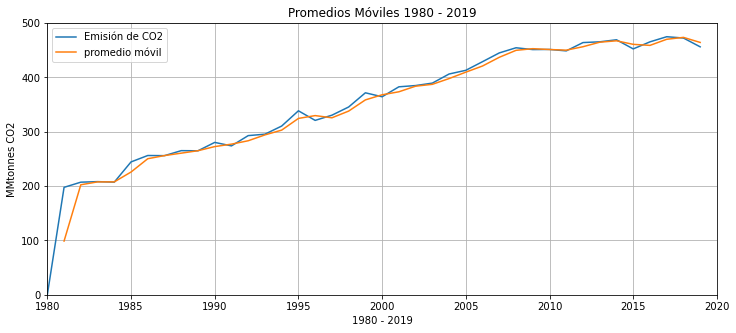

In [31]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'CO2_emission',
             data = all_energy_df,
             label = 'Emisión de CO2')
  
sns.lineplot( x = 'Year',
             y = 'Change_CO2',
             data = all_energy_df,
             label = 'promedio móvil')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.CO2_emission));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Cambio promedio móvil por año: ',moving_averages)
print('Cambio promedio móvil:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Promedios Móviles 1980 - 2019')
plt.xlabel('1980 - 2019')
plt.ylabel('MMtonnes CO2')
plt.xlim(1980, 2020)
plt.ylim(0, 500)
plt.grid(True)

plt.show()

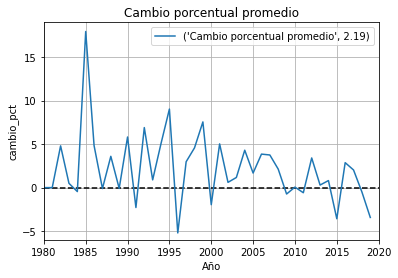

In [32]:
all_energy_df['pct_change'] = all_energy_df.CO2_emission.pct_change() * 100
all_energy_df.fillna(0,axis = 0, inplace = True)
all_energy_df.at[2184, 'pct_change'] = 0

sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Cambio porcentual promedio',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Cambio porcentual promedio')
plt.xlim(1980, 2020)
plt.ylim(-6,19)
plt.ylabel('cambio_pct')
plt.xlabel('Año')
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>Emisiones de CO2 de 2015 - 2019</h3>

In [33]:
#Mirando los últimos 5 años de este conjunto de datos podemos ver que México ha reducido sus emisiones de 
#carbono, la pendiente de todo el conjunto de datos para CO2_Emissions es 
#Slope: [0.00566408] Mientras que la pendiente de los últimos 5 años de este conjunto de datos ha caído a 
#Slope: [0.00107589]. Si bien esto todavía está en aumento, podemos ver 
#que ha habido una reducción en las emisiones de CO2

In [34]:
last5_all_energy = all_energy_df.tail()

In [35]:
last5_all_energy

,Unnamed: 0,Country,Energy_type,Year,Energy_consumption,Energy_production,GDP,Population,Energy_intensity_per_capita,Energy_intensity_by_GDP,CO2_emission,Change,Change_CO2,pct_change
49308,49308,Mexico,todo_tipo_de_energía,2015,7.804191,7.699777,2230.743,122042.5,63.946500,3.498471,452.339353,7.743312,460.739498,-3.581085
50694,50694,Mexico,todo_tipo_de_energía,2016,7.973903,7.347492,2284.177,123510.2,64.560686,3.490931,465.320401,7.889047,458.829877,2.869759
52080,52080,Mexico,todo_tipo_de_energía,2017,7.960065,6.679954,2337.576,124950.2,63.705899,3.405265,474.749421,7.966984,470.034911,2.026350
53466,53466,Mexico,todo_tipo_de_energía,2018,7.905280,6.364569,2388.543,126362.2,62.560482,3.309666,472.354715,7.932672,473.552068,-0.504415
54852,54852,Mexico,todo_tipo_de_energía,2019,7.986494,5.909857,2384.142,127745.8,62.518639,3.349840,456.148338,7.945887,464.251527,-3.430976


In [36]:
# Si bien en los últimos 5 años del conjunto de datos podemos ver una pendiente descendente de las emisiones 
# de CO2, el coeficiente de determinación está en el 6%, lo que significa que solo se puede explicar el 6% 
# de la varianza, se necesitarían más datos desde 2015 en adelante hasta 
# 2040 para obtener una mejor comprensión si esta tendencia a la baja continuará.

In [37]:
x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.CO2_emission)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficiente de Determinación (R-Cuadrado): {r_squared5_ec}',
      '\nIntersección Y',lr_model5.intercept_,
     '\nPendiente:',lr_model5.coef_)

Coeficiente de Determinación (R-Cuadrado): 0.06120641702378338 
Intersección Y 329.7801014679122 
Pendiente: [0.00107589]


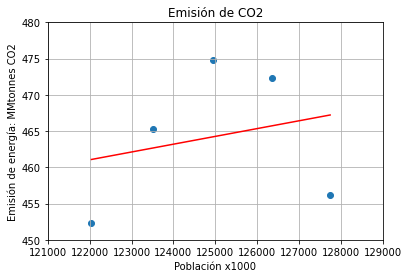

In [38]:
plt.scatter(last5_all_energy.Population, last5_all_energy.CO2_emission)
plt.grid(True)
plt.title('Emisión de CO2')
plt.xlabel('Población x1000')
plt.ylabel('Emisión de energía: MMtonnes CO2')
plt.xlim(121000, 129000)
plt.ylim(450, 480)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()

<h2>Consumo de energía</h2>

In [39]:
x_ec = np.array(all_energy_df.Population).reshape((-1,1))
y_ec = np.array(all_energy_df.Energy_consumption)

lr_model_ec = LinearRegression().fit(x_ec,y_ec)
y_pred_ec = lr_model_ec.predict(x_ec)

r_squared_ec = lr_model_ec.score(x_ec,y_ec)
print(f'Coeficiente de Determinación (R-Cuadrado): {r_squared_ec}',
      '\nIntersección Y',lr_model_ec.intercept_,
     '\nPendiente:',lr_model_ec.coef_)

Coeficiente de Determinación (R-Cuadrado): 0.9697379016613894 
Intersección Y -1.3722035331154228 
Pendiente: [7.69084988e-05]


In [40]:
X2_ec = sm.add_constant(x_ec)
est_ec = sm.OLS(y_ec, X2_ec)
est2_ec = est_ec.fit()
print(est2_ec.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1218.
Date:                Wed, 28 Dec 2022   Prob (F-statistic):           1.79e-30
Time:                        22:15:54   Log-Likelihood:                0.52207
No. Observations:                  40   AIC:                             2.956
Df Residuals:                      38   BIC:                             6.334
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.3722      0.220     -6.235      0.0

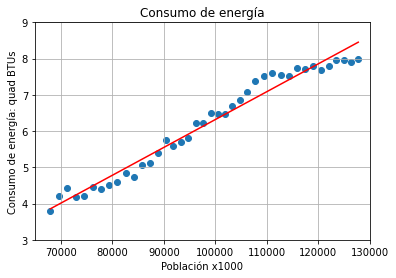

In [42]:
plt.scatter(all_energy_df.Population, all_energy_df.Energy_consumption)
plt.grid(True)
plt.title('Consumo de energía')
plt.xlabel('Población x1000')
plt.ylabel('Consumo de energía: quad BTUs')
plt.xlim(65000, 130000)
plt.ylim(3, 9)

plt.plot(x_ec, y_pred_ec, color = 'red')

plt.show()

Cambio promedio móvil por año:  [3.8, 4.0, 4.15, 4.16, 4.17, 4.22, 4.24, 4.28, 4.31, 4.37, 4.4, 4.45, 4.5, 4.57, 4.65, 4.7, 4.76, 4.82, 4.9, 4.96, 5.03, 5.1, 5.16, 5.22, 5.29, 5.36, 5.43, 5.51, 5.58, 5.65, 5.71, 5.77, 5.83, 5.89, 5.94, 5.99, 6.04, 6.09, 6.14, 6.19]
Cambio promedio móvil: 5.03


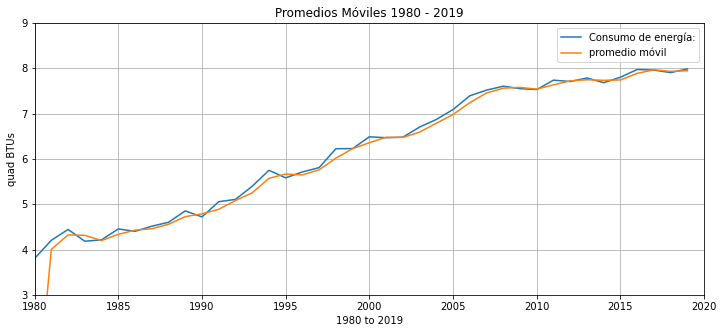

In [43]:
plt.figure( figsize = ( 12, 5))

sns.lineplot( x = 'Year',
             y = 'Energy_consumption',
             data = all_energy_df,
             label = 'Consumo de energía:')
  
sns.lineplot( x = 'Year',
             y = 'Change',
             data = all_energy_df,
             label = 'promedio móvil')

moving_averages = []
i = 1
cum_sum = np.cumsum(list(all_energy_df.Energy_consumption));

while i <= 40:
    window_average = round(cum_sum[i-1] / i, 2)
    moving_averages.append(window_average)
    i += 1
    
print('Cambio promedio móvil por año: ',moving_averages)
print('Cambio promedio móvil:',round(sum(moving_averages)/len(moving_averages), 2))
plt.title('Promedios Móviles 1980 - 2019')
plt.xlabel('1980 to 2019')
plt.ylabel('quad BTUs')
plt.xlim(1980, 2020)
plt.ylim(3, 9)
plt.grid(True)

plt.show()

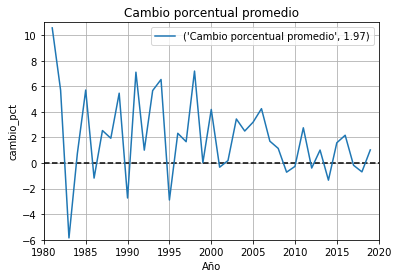

In [44]:
all_energy_df['pct_change'] = all_energy_df.Energy_consumption.pct_change() * 100
sns.lineplot(x = 'Year',
             y = 'pct_change',
             data = all_energy_df,
             label = ('Cambio porcentual promedio',round(all_energy_df["pct_change"].mean(), 2)))
plt.grid(True)
plt.title('Cambio porcentual promedio')
plt.ylabel('cambio_pct')
plt.xlabel('Año')
plt.xlim(1980, 2020)
plt.ylim(-6,11)
plt.hlines(0,xmin = 1980, xmax = 2020, colors = 'black', linestyles = 'dashed' )

plt.show()

<h3>Consumo de energía de 2015-2019</h3>

In [45]:
# Al observar los últimos 5 años del conjunto de datos, 
# podemos ver que México ha tenido un aumento en el consumo de energía.

In [46]:
x5_ec = np.array(last5_all_energy.Population).reshape((-1,1))
y5_ec = np.array(last5_all_energy.Energy_consumption)

lr_model5 = LinearRegression().fit(x5_ec,y5_ec)
y_pred5 = lr_model5.predict(x5_ec)

r_squared5_ec = lr_model5.score(x5_ec,y5_ec)
print(f'Coeficiente de Determinación: {r_squared5_ec}',
      '\nIntersección Y:',lr_model5.intercept_,
     '\nPendiente:',lr_model5.coef_)

Coeficiente de Determinación: 0.3970120955563744 
Intersección Y: 5.314553750802255 
Pendiente: [2.09044763e-05]


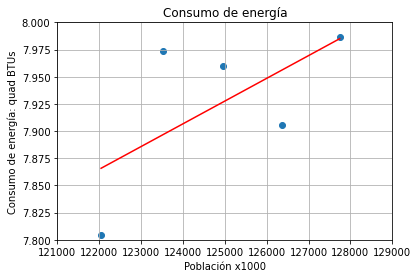

In [47]:
plt.scatter(last5_all_energy.Population, last5_all_energy.Energy_consumption)
plt.grid(True)
plt.title('Consumo de energía')
plt.xlabel('Población x1000')
plt.ylabel('Consumo de energía: quad BTUs')
plt.xlim(121000, 129000)
plt.ylim(7.8, 8)

plt.plot(x5_ec, y_pred5, color = 'red')

plt.show()